In [1]:
# Data Ingestion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('kc_house_data.csv')
data_df.shape

(21613, 21)

In [3]:
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data_df['sqft_above']=data_df['sqft_above'].fillna('mean')

In [6]:
# EDA/Descriptive Analysis
data_df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

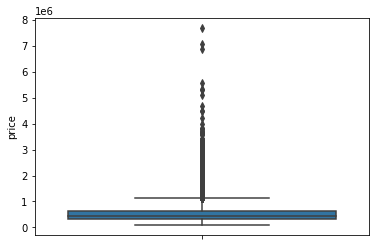

In [7]:
data_df['bedrooms'].head()
sns.boxplot(y=data_df['price'])

[(0.0, 2000000.0)]

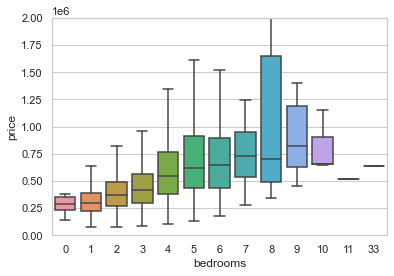

In [8]:
sns.set_theme(style="whitegrid")
ax=sns.boxplot(y=data_df['price'], x = data_df['bedrooms'], data=data_df, showfliers=False)
ax.set(ylim=(0,2e6))

In [9]:
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

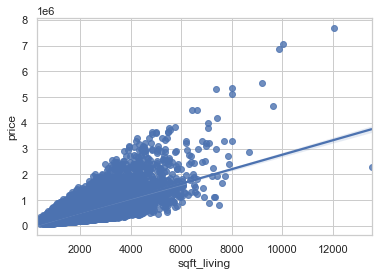

In [10]:
# Feature Engineering

sns.regplot(x="sqft_living", y="price", data=data_df, color='b')

In [13]:
data_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

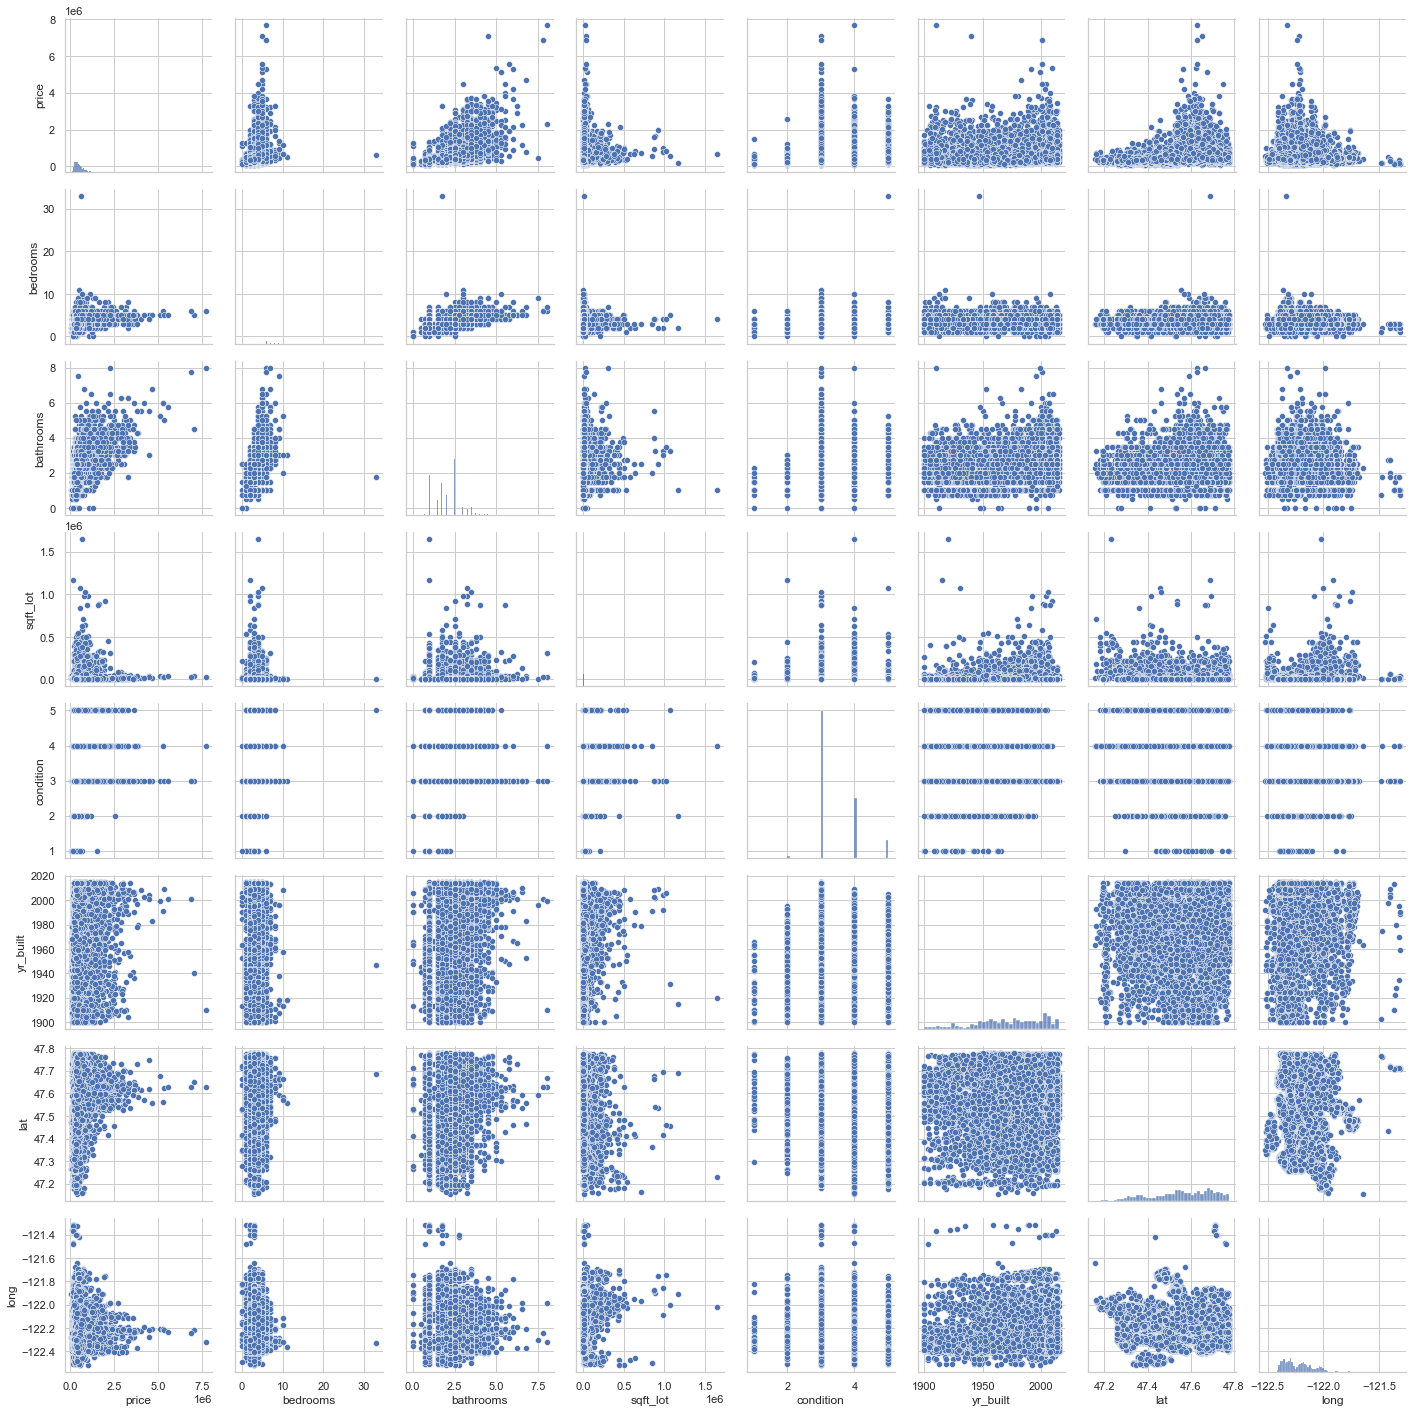

In [14]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'condition', 'sqft_above', 'yr_built', 'lat', 'long']

sns.pairplot(data_df[cols])

In [25]:
correlation =data_df.corr()
correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [29]:
correlation.iloc[1].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [32]:
data_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [158]:
#slicing data
y = data_df['price']
features = ['sqft_living', "grade", "sqft_living15", "bathrooms", "view", 'sqft_basement', 'bedrooms', 'lat',
            'waterfront', "floors", "yr_renovated","sqft_lot" ]
X = data_df[features]

In [159]:
#model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) #due to this selection error value changes much

### Due to random selection of train_test_split error value changes much

In [160]:
X_train.shape

(17290, 12)

In [161]:
#Linear Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [162]:
lr.coef_

array([ 2.01982033e+02,  8.08041424e+04,  4.90929339e+00, -2.92627646e+03,
        6.64801811e+04, -8.56804026e+00, -2.79523746e+04,  6.60015146e+05,
        5.29566382e+05, -3.15697805e+04,  6.42470037e+01, -1.79754067e-01])

In [163]:
lr.intercept_

-31770910.418787282

In [164]:
# compare prediction
data_test = pd.DataFrame()
data_test['actual'] = y_test 
data_test['pred'] = lr.predict(X_test)

In [165]:
data_test.head()

,actual,pred
15451,526000.0,5.852383e+05
9252,1190000.0,1.617167e+06
11685,1135000.0,1.581493e+06
13531,233000.0,2.129538e+05
14470,528000.0,7.202538e+05


In [166]:
# evaluate
data_test['error'] = data_test['actual'] - data_test['pred']
data_test['error'].mean()
# rmse
# x=data_test['error'].mean()
# x=x*x
# import math
# rmse = math.sqrt(x)
# rmse

-559.2283997104707

[(0.0, 4000000.0), (0.0, 500000.0)]

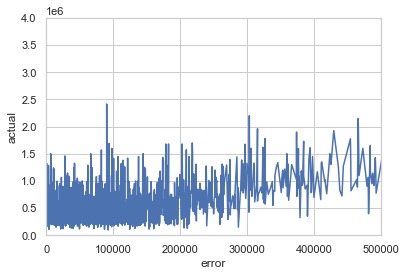

In [148]:
error = sns.lineplot(x="error",y="actual", data=data_test)
error.set(ylim=(0,4e6),xlim=(0,.5e6))

### When 
1. features = ['sqft_living', "grade", "sqft_living15", "bathrooms", "view", 'sqft_basement', 'bedrooms', 'lat', 'waterfront', "floors", "yr_renovated","sqft_lot" ] Error = 3312.2792208363676 / -559.2283997104707

2. features = ['sqft_living', "grade", "sqft_living15", "bathrooms", "view", 'sqft_basement', 'bedrooms', 'lat',
            'waterfront', "floors", "yr_renovated" ]
            
error = -2056.593679389982 / 6123.583698821189 / -182.99419762488526

3. features = ['sqft_living', "grade", "sqft_living15", "bathrooms", "view", 'sqft_basement', 'bedrooms', 'lat']
error = 4342.925199991505 / -3604.682761692331 /  -4508.421568389168


In [111]:
data_test.corr()

,actual,pred,error
actual,1.000000,0.813285,0.539870
pred,0.813285,1.000000,-0.050716
error,0.539870,-0.050716,1.000000
